# INSY662 - Group Project - Predicting Airline Fares

### Problem Definition and Motivation



### Dataset Description 


### Initial Processing Steps

In [100]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import re

# Load dataset in folder Data 
df = pd.read_csv('data/processed_data.csv')
df.head()

# keep only 20% of rows 
data = df.sample(frac=0.05, random_state=42)




In [101]:
# 1) Check data types 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205347 entries, 1042959 to 1887118
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   legId                              205347 non-null  object 
 1   searchDate                         205347 non-null  object 
 2   flightDate                         205347 non-null  object 
 3   startingAirport                    205347 non-null  object 
 4   destinationAirport                 205347 non-null  object 
 5   fareBasisCode                      205347 non-null  object 
 6   travelDuration                     205347 non-null  object 
 7   elapsedDays                        205347 non-null  int64  
 8   isBasicEconomy                     205347 non-null  bool   
 9   isRefundable                       205347 non-null  bool   
 10  isNonStop                          205347 non-null  bool   
 11  baseFare                           20

In [102]:
# Chekck missing values
data.isnull().sum()

legId                                    0
searchDate                               0
flightDate                               0
startingAirport                          0
destinationAirport                       0
fareBasisCode                            0
travelDuration                           0
elapsedDays                              0
isBasicEconomy                           0
isRefundable                             0
isNonStop                                0
baseFare                                 0
totalFare                                0
seatsRemaining                           0
totalTravelDistance                  15255
segmentsDepartureTimeEpochSeconds        0
segmentsDepartureTimeRaw                 0
segmentsArrivalTimeEpochSeconds          0
segmentsArrivalTimeRaw                   0
segmentsArrivalAirportCode               0
segmentsDepartureAirportCode             0
segmentsAirlineName                      0
segmentsAirlineCode                      0
segmentsEqu

In [103]:
# Missing value Ration
missing_ratio = data.isnull().sum() / len(data) * 100
missing_ratio = missing_ratio[missing_ratio > 0].sort_values(ascending=False)
missing_ratio

totalTravelDistance             7.428889
segmentsEquipmentDescription    1.905555
segmentsDistance                1.023633
dtype: float64

In [104]:
# ---------- Find dupplicates ----------------
dupplicates = data[data.duplicated()]
ratio = len(dupplicates) / len(data) * 100
print(f"There are {len(dupplicates)} out of {len(data)} rows, representing {ratio:.2f}%")

# Ratio is low, drop
data = data.drop_duplicates()
dupplicates = data[data.duplicated()]
ratio = len(dupplicates) / len(data) * 100
print(f"There are {len(dupplicates)} out of {len(data)} rows, representing {ratio:.2f}%")


There are 256 out of 205347 rows, representing 0.12%
There are 0 out of 205091 rows, representing 0.00%


#### Data Cleaning

In [ ]:
# ------Drop unecessary segment columns---------
# Reasons: redundent information or not relevant to objective of analysis
unecessary_col = ['segmentsDepartureTimeEpochSeconds', 'segmentsArrivalTimeEpochSeconds', 'segmentsAirlineCode', 
                  'segmentsEquipmentDescription', 'segmentsEquipmentDescription', 'fareBasisCode', 'segmentsDurationInSeconds', 'segmentsDistance']
data = data.drop(columns = unecessary_col)


KeyError: "['segmentsDepartureTimeEpochSeconds', 'segmentsArrivalTimeEpochSeconds', 'segmentsAirlineCode', 'segmentsEquipmentDescription', 'segmentsEquipmentDescription', 'fareBasisCode', 'segmentsDurationInSeconds', 'segmentsDistance'] not found in axis"

In [108]:
data.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeRaw,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsCabinCode
1042959,476b78efd396326a49ab6c014062580d,2022-06-05,2022-06-08,BOS,OAK,PT17H51M,0,False,False,False,740.47,829.71,9,2945.0,2022-06-08T07:30:00.000-04:00||2022-06-08T15:4...,2022-06-08T09:20:00.000-05:00||2022-06-08T17:5...,ORD||LAX||OAK,BOS||ORD||LAX,United||United||Delta,coach||coach||coach
1437841,f51769cb2653b33e5cfa08c03f807e60,2022-06-23,2022-06-29,DFW,DTW,PT2H41M,0,False,False,True,339.53,379.60,6,995.0,2022-06-29T18:39:00.000-05:00,2022-06-29T22:20:00.000-04:00,DTW,DFW,Delta,coach
1067453,70a386ff829092750869136b4c710568,2022-06-08,2022-06-14,LAX,CLT,PT10H59M,0,False,False,False,626.98,702.10,1,2275.0,2022-06-14T08:20:00.000-07:00||2022-06-14T16:4...,2022-06-14T13:25:00.000-05:00||2022-06-14T20:0...,AUS||ATL||CLT,LAX||AUS||ATL,Alaska Airlines||Delta||Delta,coach||coach||coach
198386,15a2d8dc5cb7b3ec0210f1f87adcbade,2022-04-23,2022-06-12,IAD,LAX,PT14H50M,0,False,False,False,556.28,627.20,7,2679.0,2022-06-12T07:33:00.000-04:00||2022-06-12T16:1...,2022-06-12T08:50:00.000-04:00||2022-06-12T19:2...,EWR||LAX,IAD||EWR,United||Alaska Airlines,coach||coach
2674967,5a26f39498d66b0836491c0aebb4f080,2022-08-07,2022-09-06,JFK,DEN,PT8H43M,0,False,False,False,537.67,601.60,9,1694.0,2022-09-06T11:22:00.000-04:00||2022-09-06T16:0...,2022-09-06T12:48:00.000-04:00||2022-09-06T18:0...,DCA||DEN,JFK||DCA,Delta||United,coach||coach


In [109]:
data.columns.tolist()

['legId',
 'searchDate',
 'flightDate',
 'startingAirport',
 'destinationAirport',
 'travelDuration',
 'elapsedDays',
 'isBasicEconomy',
 'isRefundable',
 'isNonStop',
 'baseFare',
 'totalFare',
 'seatsRemaining',
 'totalTravelDistance',
 'segmentsDepartureTimeRaw',
 'segmentsArrivalTimeRaw',
 'segmentsArrivalAirportCode',
 'segmentsDepartureAirportCode',
 'segmentsAirlineName',
 'segmentsCabinCode']

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205091 entries, 1042959 to 1887118
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   legId                         205091 non-null  object 
 1   searchDate                    205091 non-null  object 
 2   flightDate                    205091 non-null  object 
 3   startingAirport               205091 non-null  object 
 4   destinationAirport            205091 non-null  object 
 5   travelDuration                205091 non-null  object 
 6   elapsedDays                   205091 non-null  int64  
 7   isBasicEconomy                205091 non-null  bool   
 8   isRefundable                  205091 non-null  bool   
 9   isNonStop                     205091 non-null  bool   
 10  baseFare                      205091 non-null  float64
 11  totalFare                     205091 non-null  float64
 12  seatsRemaining                205091 non-n

In [111]:

SEP = '||'

# Extract first departure and last arrival
dep_first_raw = (
    data['segmentsDepartureTimeRaw']
    .astype(str)
    .str.split(SEP, regex=False)
    .str.get(0)
    .str.strip()
)

arr_last_raw = (
    data['segmentsArrivalTimeRaw']
    .astype(str)
    .str.split(SEP, regex=False)
    .str.get(-1)
    .str.strip()
)

# Convert to proper datetimes (with timezone handling)
dep_dt = pd.to_datetime(dep_first_raw, utc=True, errors='coerce')
arr_dt = pd.to_datetime(arr_last_raw,  utc=True, errors='coerce')

# Extract only the time part (HH:MM:SS)
data['itineraryDeparture_time'] = dep_dt.dt.time
data['itineraryArrival_time']   = arr_dt.dt.time
data = data.drop(columns = ['segmentsDepartureTimeRaw', 'segmentsArrivalTimeRaw' ])


In [112]:
data.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsCabinCode,itineraryDeparture_time,itineraryArrival_time
1042959,476b78efd396326a49ab6c014062580d,2022-06-05,2022-06-08,BOS,OAK,PT17H51M,0,False,False,False,740.47,829.71,9,2945.0,ORD||LAX||OAK,BOS||ORD||LAX,United||United||Delta,coach||coach||coach,11:30:00,05:21:00
1437841,f51769cb2653b33e5cfa08c03f807e60,2022-06-23,2022-06-29,DFW,DTW,PT2H41M,0,False,False,True,339.53,379.60,6,995.0,DTW,DFW,Delta,coach,23:39:00,02:20:00
1067453,70a386ff829092750869136b4c710568,2022-06-08,2022-06-14,LAX,CLT,PT10H59M,0,False,False,False,626.98,702.10,1,2275.0,AUS||ATL||CLT,LAX||AUS||ATL,Alaska Airlines||Delta||Delta,coach||coach||coach,15:20:00,02:19:00
198386,15a2d8dc5cb7b3ec0210f1f87adcbade,2022-04-23,2022-06-12,IAD,LAX,PT14H50M,0,False,False,False,556.28,627.20,7,2679.0,EWR||LAX,IAD||EWR,United||Alaska Airlines,coach||coach,11:33:00,02:23:00
2674967,5a26f39498d66b0836491c0aebb4f080,2022-08-07,2022-09-06,JFK,DEN,PT8H43M,0,False,False,False,537.67,601.60,9,1694.0,DCA||DEN,JFK||DCA,Delta||United,coach||coach,15:22:00,00:05:00


In [ ]:
# ------------ Correct Data Types of Segments ----------------

# List segment columns
#segmentsTime_cols = [col for col in data.columns if "timeraw" in col.lower()]
#segmentsTime_cols
#
## Split columns per segment and drop original column
#for col in segmentsTime_cols:
#    split_cols = data[col].str.split("||", expand=True, regex=False)
#    split_cols = split_cols.dropna(axis = 1, how = "all")
#    split_cols.columns = [f"{col}_{i+1}" for i in range(split_cols.shape[1])]
#    data = pd.concat([data, split_cols], axis = 1)
#    data = data.drop(columns = [col])

# List segment columns
#for col in segmentsTime_cols:
#    data[col] = pd.to_datetime(data[col], errors='coerce', utc=True)
#for c in segmentsTime_cols:
#    data[c] = data[c].dt.tz_localize(None)

# segmentsNumerical_cols = [col for col in data.columns if "seconds" in col.lower() or "distance" in col.lower()]
# for col in segmentsNumerical_cols:
#     data[col] = pd.to_numeric(data[col], errors='coerce').astype('Int64')


                                    legId  searchDate  flightDate  \
1042959  476b78efd396326a49ab6c014062580d  2022-06-05  2022-06-08   
1437841  f51769cb2653b33e5cfa08c03f807e60  2022-06-23  2022-06-29   
1067453  70a386ff829092750869136b4c710568  2022-06-08  2022-06-14   
198386   15a2d8dc5cb7b3ec0210f1f87adcbade  2022-04-23  2022-06-12   
2674967  5a26f39498d66b0836491c0aebb4f080  2022-08-07  2022-09-06   
...                                   ...         ...         ...   
2792471  9c1ff52aaefd7a4f5065c233af3ff578  2022-08-10  2022-09-04   
39596    97dec2c658314b0ae1a2e03645f02b48  2022-04-16  2022-04-25   
1117427  8e82871dddc6fcf81b70ca27f7ab95ff  2022-06-11  2022-07-04   
3329802  dbef45b959930d0c94965df64b73bd30  2022-09-03  2022-10-04   
1887118  ccf8b598d859ded9608346b1e472427b  2022-07-08  2022-08-28   

        startingAirport destinationAirport travelDuration  elapsedDays  \
1042959             BOS                OAK       PT17H51M            0   
1437841             DFW

In [114]:
# ---------Clean Other DataTypes----------------

# Transfrom data columns into correct data types
data['searchDate'] = pd.to_datetime(data['searchDate'])
data['flightDate'] = pd.to_datetime(data['flightDate'])






In [115]:
#------------- Clean Travel Duration column --------------
def parse_travel_duration(s):
    if pd.isnull(s):
        return None
    
    # ISO 8601 duration pattern (supports P1D, P2W, PT5H30M, etc.)
    pattern = (
        r'P'                            # starts with P
        r'(?:(\d+)D)?'                  # days
        r'(?:(\d+)W)?'                  # weeks
        r'(?:T(?:(\d+)H)?(?:(\d+)M)?)?' # time part (hours/minutes)
    )
    match = re.match(pattern, s)
    if not match:
        return None
    
    days = int(match.group(1)) if match.group(1) else 0
    weeks = int(match.group(2)) if match.group(2) else 0
    hours = int(match.group(3)) if match.group(3) else 0
    minutes = int(match.group(4)) if match.group(4) else 0

    total_hours = weeks * 7 * 24 + days * 24 + hours + minutes / 60
    return total_hours

# Apply it
data['travelDuration_hours'] = data['travelDuration'].apply(parse_travel_duration)
data = data.drop(columns='travelDuration')






In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205091 entries, 1042959 to 1887118
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   legId                         205091 non-null  object        
 1   searchDate                    205091 non-null  datetime64[ns]
 2   flightDate                    205091 non-null  datetime64[ns]
 3   startingAirport               205091 non-null  object        
 4   destinationAirport            205091 non-null  object        
 5   elapsedDays                   205091 non-null  int64         
 6   isBasicEconomy                205091 non-null  bool          
 7   isRefundable                  205091 non-null  bool          
 8   isNonStop                     205091 non-null  bool          
 9   baseFare                      205091 non-null  float64       
 10  totalFare                     205091 non-null  float64       
 11  seatsRemain

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205091 entries, 1042959 to 1887118
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   legId                         205091 non-null  object        
 1   searchDate                    205091 non-null  datetime64[ns]
 2   flightDate                    205091 non-null  datetime64[ns]
 3   startingAirport               205091 non-null  object        
 4   destinationAirport            205091 non-null  object        
 5   elapsedDays                   205091 non-null  int64         
 6   isBasicEconomy                205091 non-null  bool          
 7   isRefundable                  205091 non-null  bool          
 8   isNonStop                     205091 non-null  bool          
 9   baseFare                      205091 non-null  float64       
 10  totalFare                     205091 non-null  float64       
 11  seatsRemain

In [118]:
data.describe()

,searchDate,flightDate,elapsedDays,baseFare,totalFare,seatsRemaining,totalTravelDistance,travelDuration_hours
count,205091,205091,205091.000000,205091.000000,205091.000000,205091.000000,189857.000000,205091.000000
mean,2022-07-13 21:37:43.254848,2022-08-09 17:48:12.150313472,0.149485,292.735894,340.451497,5.976601,1609.069184,7.139293
min,2022-04-16 00:00:00,2022-04-17 00:00:00,0.000000,0.410000,19.590000,0.000000,89.000000,0.766667
25%,2022-06-05 00:00:00,2022-07-01 00:00:00,0.000000,159.000000,197.100000,4.000000,876.000000,4.350000
50%,2022-07-16 00:00:00,2022-08-14 00:00:00,0.000000,259.530000,303.700000,7.000000,1464.000000,6.816667
75%,2022-08-23 00:00:00,2022-09-18 00:00:00,0.000000,398.140000,452.700000,9.000000,2417.000000,9.433333
max,2022-10-05 00:00:00,2022-11-19 00:00:00,2.000000,4407.440000,4752.600000,10.000000,4498.000000,35.000000
std,NaN,NaN,0.356608,183.484098,196.363650,2.878256,857.232738,3.759692


In [51]:
# Question: Handling Outliers

### Exploratory Data Analysis (EDA) results

In [119]:
# Look at numerical relatioships with Total Fare

import seaborn as sns
import matplotlib.pyplot as plt

def num_plotter(data, target):

    num_cols = data.select_dtypes(include=["int", "float"]).columns

    for col in num_cols:
        if col == target:
            continue  

        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=col, y=target, data=data, alpha=0.3)
        plt.title(f"{col} vs {target}")
        plt.tight_layout()
        plt.show()


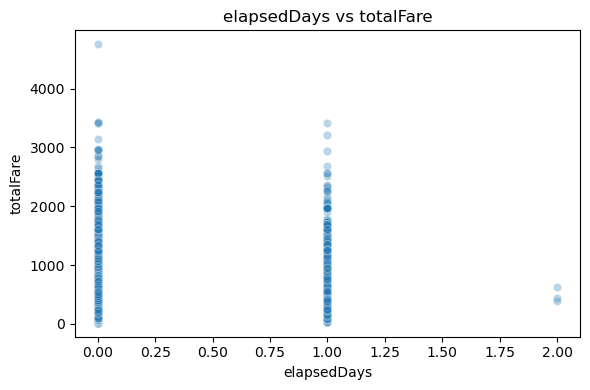

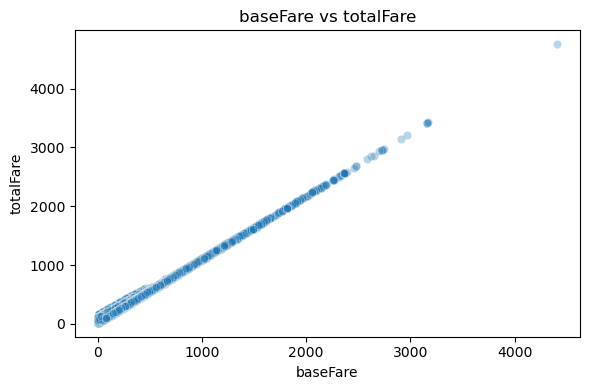

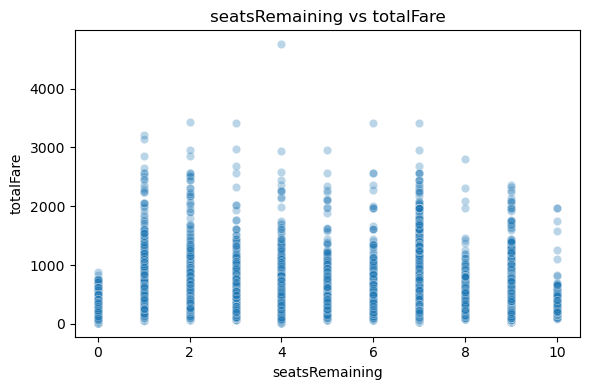

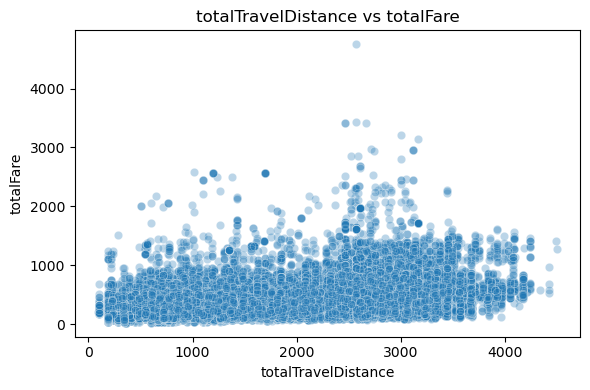

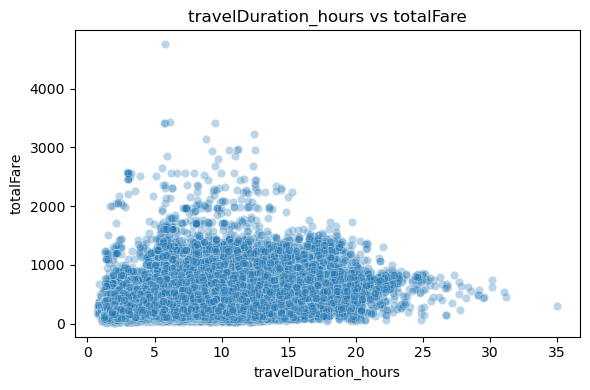

In [120]:
num_plotter(data, "totalFare")


In [121]:
# Look at categorical variable relationships with Total Fare
def cat_plotter(data, target, sample_size=100000):
    cat_cols = [
        'startingAirport',
        'destinationAirport'
    ]
    
    
    # 3. Plot
    for col in cat_cols:
        plt.figure(figsize=(8, 4))
        sns.barplot(
            data=(
                data
                .groupby(col, as_index=False)
                .agg({target: "mean"})
                .sort_values(by=target, ascending=False)
            ), 
            x=col, 
            y=target
        )
        plt.title(f"Average {target} by {col}")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    

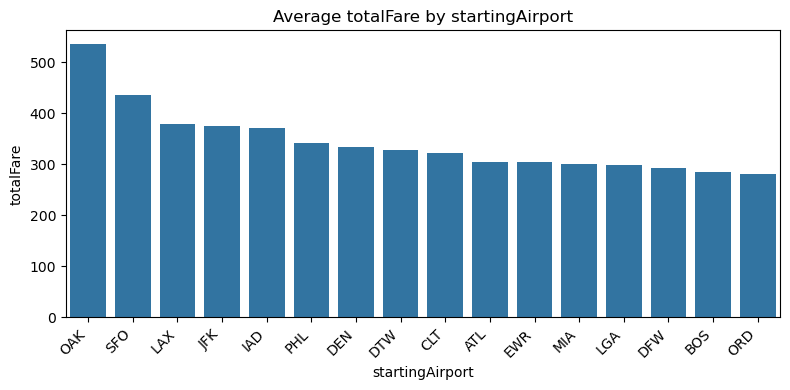

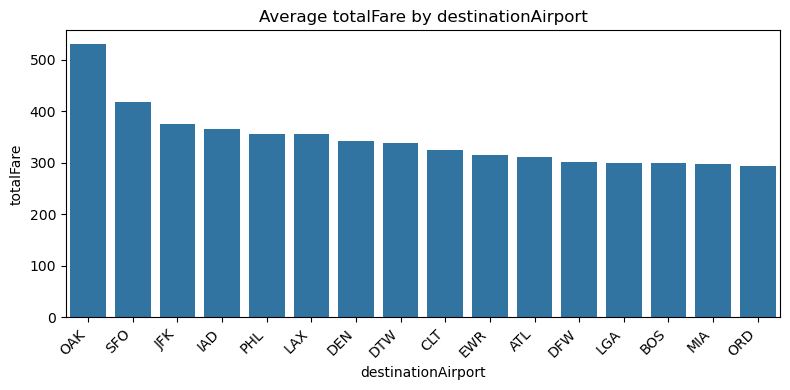

In [122]:
cat_plotter(data, "totalFare", sample_size=100000)


                      elapsedDays  baseFare  totalFare  seatsRemaining  \
elapsedDays              1.000000  0.135252   0.145732       -0.024762   
baseFare                 0.135252  1.000000   0.996711        0.059145   
totalFare                0.145732  0.996711   1.000000        0.020617   
seatsRemaining          -0.024762  0.059145   0.020617        1.000000   
totalTravelDistance      0.294933  0.486401   0.493158       -0.054751   
travelDuration_hours     0.384262  0.390699   0.427200       -0.149538   

                      totalTravelDistance  travelDuration_hours  
elapsedDays                      0.294933              0.384262  
baseFare                         0.486401              0.390699  
totalFare                        0.493158              0.427200  
seatsRemaining                  -0.054751             -0.149538  
totalTravelDistance              1.000000              0.708364  
travelDuration_hours             0.708364              1.000000  


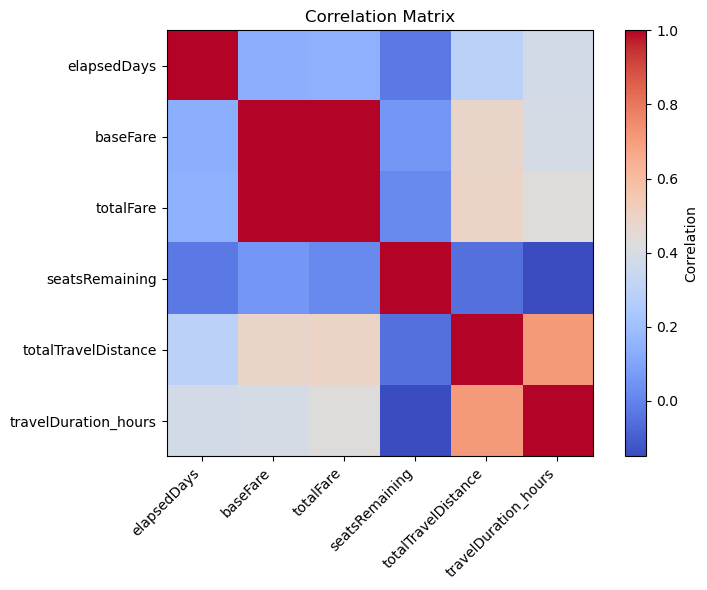

In [123]:
import matplotlib.pyplot as plt
import pandas as pd


# Select only numeric columns
num_df = data.select_dtypes(include=['number'])
# remove segment columns for clarity
num_df = num_df[[col for col in num_df.columns if 'segment' not in col.lower()]]


# Compute correlation matrix
corr = num_df.corr()

# Display top correlations
print(corr)

# Visualize (Matplotlib heatmap only)
plt.figure(figsize=(8,6))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


In [124]:
data = data.drop(columns = 'baseFare')

### Feature engineering steps

##### Scaling
##### Encoding
##### Binning
##### Transformations
##### Handling Outliers
##### Creation of Derived Variables

In [125]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [126]:
# Create new column for number of days between search date and flight date
data['date_diff'] = (data['flightDate'] - data['searchDate']).dt.days

In [144]:
# ------------- Clean/Split Segment Columns ---------------


# List segment columns
segments = [col for col in data.columns if "segment" in col.lower()]
segments

# Count number of connections
for col in segments:
    split_cols = data[col].str.split("||", expand=True, regex=False)

def count_connections(row):
    if isinstance(row, str):
        airlines = row.split('||')
        return len(set(airlines))
    return 0

data['num_connections'] = data['segmentsArrivalAirportCode'].apply(count_connections)

data['flight_arrivalDate'] = data['flightDate'] + pd.to_timedelta(data['elapsedDays'], unit='D')

#  day of the week for Flight and Search (monday=1, sunday=7)
data['flight_dayofweek'] = data['flightDate'].dt.dayofweek+1  
data['search_dayofweek'] = data['searchDate'].dt.dayofweek+1

# classify if flight is on weekend (1) or weekday (0)
data['is_weekend_flight'] = data['flight_dayofweek'].apply(lambda x: 1 if x in [5, 6] else 0)   

# add seasonality column: summer or not (April, May, September, October not summer)
data['is_summer'] = data['flightDate'].apply(
    lambda x: 1 if pd.notnull(x) and x.month in [6, 7, 8] else 0)

In [146]:
data.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,elapsedDays,isBasicEconomy,isRefundable,isNonStop,totalFare,...,itineraryDeparture_time,itineraryArrival_time,travelDuration_hours,date_diff,num_connections,flight_arrivalDate,flight_dayofweek,search_dayofweek,is_weekend_flight,is_summer
1042959,476b78efd396326a49ab6c014062580d,2022-06-05,2022-06-08,BOS,OAK,0,False,False,False,829.71,...,11:30:00,05:21:00,17.850000,3,3,2022-06-08,3,7,0,1
1437841,f51769cb2653b33e5cfa08c03f807e60,2022-06-23,2022-06-29,DFW,DTW,0,False,False,True,379.60,...,23:39:00,02:20:00,2.683333,6,1,2022-06-29,3,4,0,1
1067453,70a386ff829092750869136b4c710568,2022-06-08,2022-06-14,LAX,CLT,0,False,False,False,702.10,...,15:20:00,02:19:00,10.983333,6,3,2022-06-14,2,3,0,1
198386,15a2d8dc5cb7b3ec0210f1f87adcbade,2022-04-23,2022-06-12,IAD,LAX,0,False,False,False,627.20,...,11:33:00,02:23:00,14.833333,50,2,2022-06-12,7,6,0,1
2674967,5a26f39498d66b0836491c0aebb4f080,2022-08-07,2022-09-06,JFK,DEN,0,False,False,False,601.60,...,15:22:00,00:05:00,8.716667,30,2,2022-09-06,2,7,0,0


In [59]:
# ------- Scaling ------

num_col = data.select_dtypes(['int64', 'float64', 'Int64']).columns.tolist()

X = data[num_col]
y = data['totalFare']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2025)


In [60]:
std = StandardScaler()

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [61]:
# ------- Encoding ---------

cat_cols = [
    'startingAirport', 'destinationAirport',
    'segmentsArrivalAirportCode_1', 'segmentsArrivalAirportCode_2', 
    'segmentsArrivalAirportCode_3', 'segmentsArrivalAirportCode_4', 'segmentsArrivalAirportCode_5',
    'segmentsDepartureAirportCode_1', 'segmentsDepartureAirportCode_2',
    'segmentsDepartureAirportCode_3', 'segmentsDepartureAirportCode_4', 'segmentsDepartureAirportCode_5',
    'segmentsAirlineName_1', 'segmentsAirlineName_2', 'segmentsAirlineName_3', 
    'segmentsAirlineName_4', 'segmentsAirlineName_5',
    'segmentsCabinCode_1', 'segmentsCabinCode_2', 'segmentsCabinCode_3',
    'segmentsCabinCode_4', 'segmentsCabinCode_5'   
]
col_dummy = data[cat_cols]

eng_data = pd.get_dummies(col_dummy, drop_first=True)

eng_data.dtypes


startingAirport_BOS                  bool
startingAirport_CLT                  bool
startingAirport_DEN                  bool
startingAirport_DFW                  bool
startingAirport_DTW                  bool
                                     ... 
segmentsCabinCode_3_coach            bool
segmentsCabinCode_3_first            bool
segmentsCabinCode_3_premium coach    bool
segmentsCabinCode_4_first            bool
segmentsCabinCode_4_premium coach    bool
Length: 722, dtype: object

In [62]:
# ------ Bining ----------

def bin_columns(df):
    
    df['seatsRemaining_bin'] = pd.cut(df['seatsRemaining'], bins=[-1, 2, 5, 10], labels=['1-2', '3-5', '6-10'])
    
    df['travelDuration_hours_bin'] = pd.cut(df['travelDuration_hours'],
                                            bins=[-1, 3, 6, 12, float('inf')],
                                            labels=['<3h', '3-6h', '6-12h', '>12h'])
    
    df['totalTravelDistance_bin'] = pd.cut(df['totalTravelDistance'],
                                           bins=[-1, 500, 1000, 2000, float('inf')],
                                           labels=['<500', '500-1000', '1000-2000', '2000+'])
    
    return df

bin_columns(data)

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,elapsedDays,isBasicEconomy,isRefundable,isNonStop,...,segmentsCabinCode_1,segmentsCabinCode_2,segmentsCabinCode_3,segmentsCabinCode_4,segmentsCabinCode_5,date_diff,travelDuration_hours,seatsRemaining_bin,travelDuration_hours_bin,totalTravelDistance_bin
1042959,476b78efd396326a49ab6c014062580d,2022-06-05,2022-06-08,BOS,OAK,QAA0OHEN,0,False,False,False,...,coach,coach,coach,None,None,3,17.850000,6-10,>12h,2000+
1437841,f51769cb2653b33e5cfa08c03f807e60,2022-06-23,2022-06-29,DFW,DTW,KA7NA0MQ,0,False,False,True,...,coach,None,None,None,None,6,2.683333,6-10,<3h,500-1000
1067453,70a386ff829092750869136b4c710568,2022-06-08,2022-06-14,LAX,CLT,KH0OAVMN,0,False,False,False,...,coach,coach,coach,None,None,6,10.983333,1-2,6-12h,2000+
198386,15a2d8dc5cb7b3ec0210f1f87adcbade,2022-04-23,2022-06-12,IAD,LAX,QAA4OFEN,0,False,False,False,...,coach,coach,None,None,None,50,14.833333,6-10,>12h,2000+
2674967,5a26f39498d66b0836491c0aebb4f080,2022-08-07,2022-09-06,JFK,DEN,KAVOA0MQ,0,False,False,False,...,coach,coach,None,None,None,30,8.716667,6-10,6-12h,1000-2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792471,9c1ff52aaefd7a4f5065c233af3ff578,2022-08-10,2022-09-04,PHL,SFO,NUAGZNN1,0,False,False,False,...,coach,coach,None,None,None,25,8.066667,1-2,6-12h,2000+
39596,97dec2c658314b0ae1a2e03645f02b48,2022-04-16,2022-04-25,ORD,ATL,V0AJZNN1,1,False,False,False,...,coach,coach,None,None,None,9,12.566667,6-10,>12h,1000-2000
1117427,8e82871dddc6fcf81b70ca27f7ab95ff,2022-06-11,2022-07-04,LAX,BOS,QAA0AHEN,1,False,False,True,...,coach,None,None,None,None,23,5.666667,6-10,3-6h,2000+
3329802,dbef45b959930d0c94965df64b73bd30,2022-09-03,2022-10-04,PHL,DTW,NVAHZNB3,0,True,False,False,...,coach,coach,coach,None,None,31,15.050000,6-10,>12h,1000-2000


In [63]:
# ------ Transformations --------

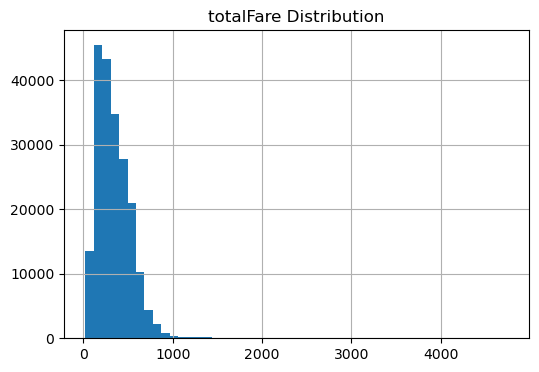

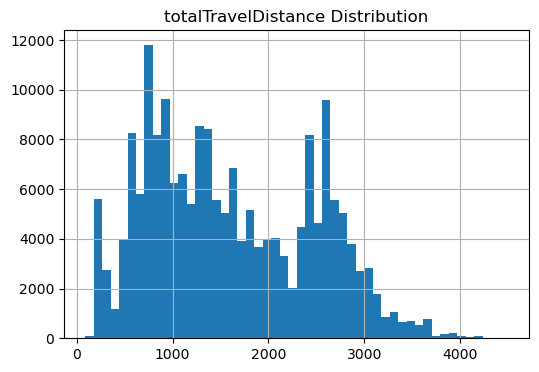

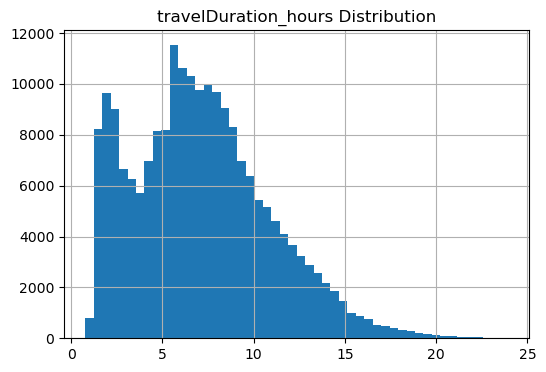

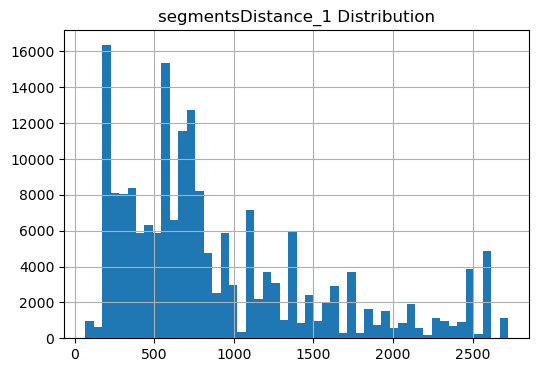

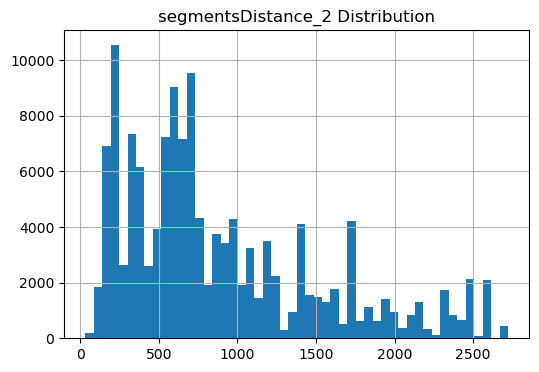

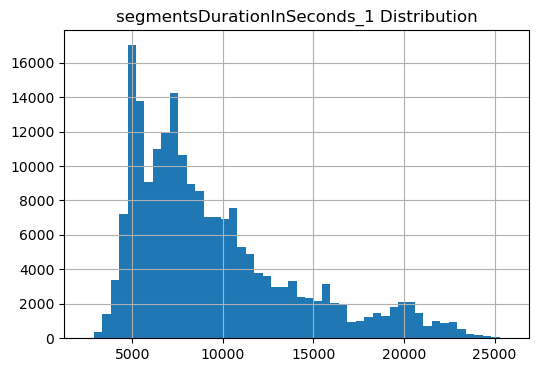

In [64]:
# ----- Checking for skewness of the numerical columns ------
num_cols = ['totalFare', 'totalTravelDistance', 'travelDuration_hours', 
            'segmentsDistance_1', 'segmentsDistance_2', 'segmentsDurationInSeconds_1']

# Plot histograms
for col in num_cols:
    plt.figure(figsize=(6,4))
    data[col].hist(bins=50)
    plt.title(f'{col} Distribution')
    plt.show()

In [65]:
# Checking if variables have 0 or negative values before applying log-transformations

log_cols = [
    'totalFare', 
    'travelDuration_hours', 
    'segmentsDistance_1', 
    'segmentsDistance_2', 
    'segmentsDurationInSeconds_1'
]

# Check for zeros or negatives
for col in log_cols:
    min_val = data[col].min()
    num_nonpositive = (data[col] <= 0).sum()
    print(f"{col}: min = {min_val}, non-positive values = {num_nonpositive}")

totalFare: min = 19.59, non-positive values = 0
travelDuration_hours: min = 0.7666666666666667, non-positive values = 0
segmentsDistance_1: min = 67, non-positive values = 0
segmentsDistance_2: min = 31, non-positive values = 0
segmentsDurationInSeconds_1: min = 2400, non-positive values = 0


In [66]:
original_cols = ['totalFare', 'travelDuration_hours', 'segmentsDistance_1', 'segmentsDistance_2', 'segmentsDurationInSeconds_1']
print(data[original_cols].isna().sum())


totalFare                          0
travelDuration_hours              70
segmentsDistance_1             15234
segmentsDistance_2             68284
segmentsDurationInSeconds_1        0
dtype: int64


In [67]:
# filling the remaining NA values before

for col in ['travelDuration_hours', 'segmentsDistance_1', 'segmentsDistance_2']:
    median_val = data[col].median()
    data[col].fillna(median_val, inplace=True)


/var/folders/tv/ktkmfz315030nmvvnn_jwqnc0000gn/T/ipykernel_84205/766224143.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(median_val, inplace=True)
/var/folders/tv/ktkmfz315030nmvvnn_jwqnc0000gn/T/ipykernel_84205/766224143.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [68]:
# ----- Log-Transformations --------

for col in log_cols:
    data[col] = data[col].astype(float)  
    data[f'log_{col}'] = np.log(data[col])  

print(data[[f'log_{col}' for col in log_cols]].head())


         log_totalFare  log_travelDuration_hours  log_segmentsDistance_1  \
1042959       6.721076                  2.882004                6.759255   
1437841       5.939118                  0.987060                6.902743   
1067453       6.554076                  2.396379                7.119636   
198386        6.441265                  2.696877                5.398163   
2674967       6.399593                  2.165237                5.398163   

         log_segmentsDistance_2  log_segmentsDurationInSeconds_1  
1042959                7.464510                         9.230143  
1437841                6.579251                         9.175749  
1067453                6.698268                         9.314700  
198386                 7.807103                         8.438150  
2674967                7.295056                         8.548692  


In [69]:
# ----- Continue to fill the NA values with median -----
na_cols = ['totalTravelDistance', 
           'segmentsDurationInSeconds_2', 'segmentsDurationInSeconds_3', 
           'segmentsDurationInSeconds_4', 'segmentsDurationInSeconds_5',
           'segmentsDistance_3', 'segmentsDistance_4', 'segmentsDistance_5']

for col in na_cols:
    data[col] = data[col].astype(float)        # convert to float
    median_val = data[col].median()            # compute median
    data[col] = data[col].fillna(median_val)  # fill NaNs


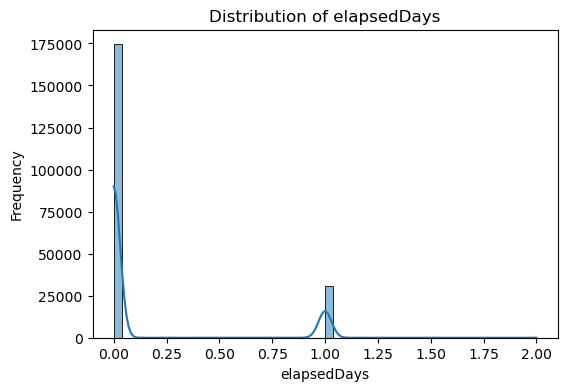

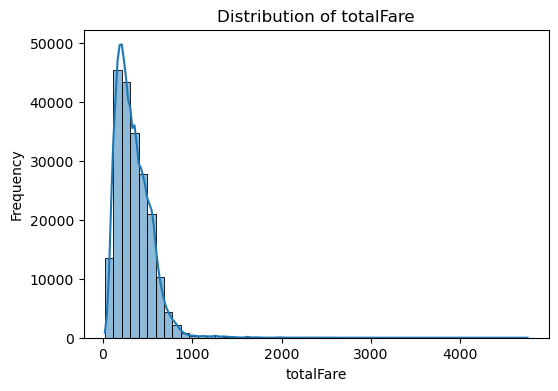

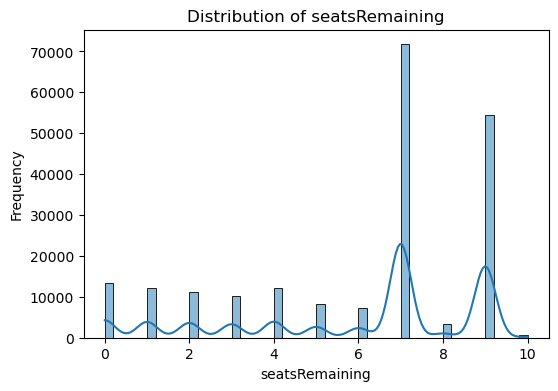

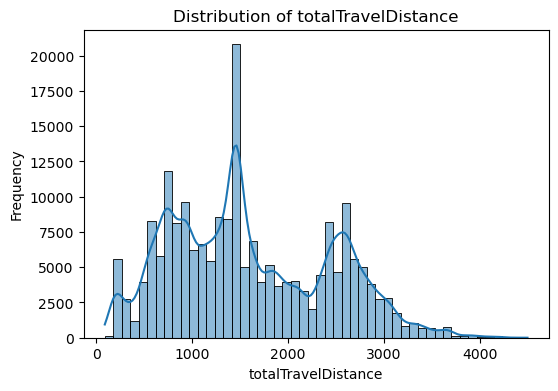

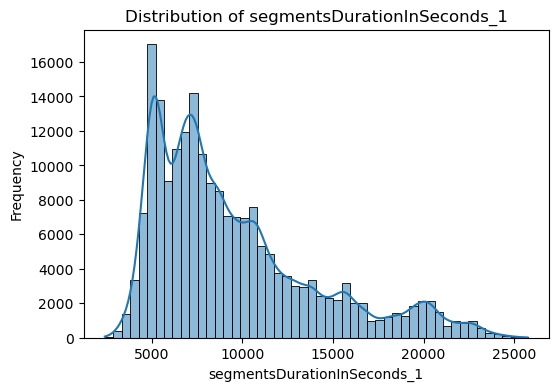

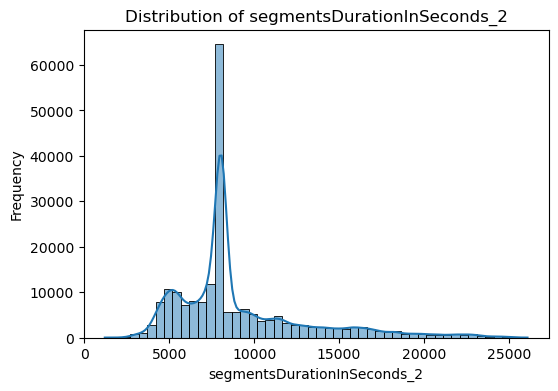

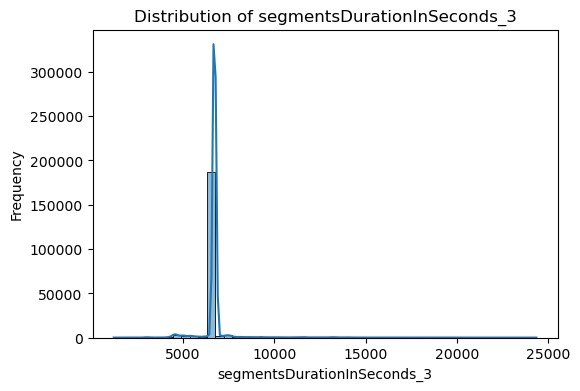

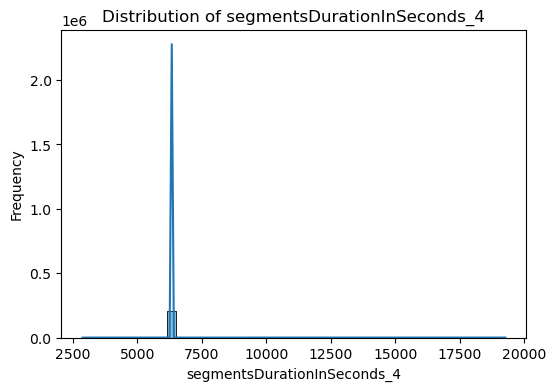

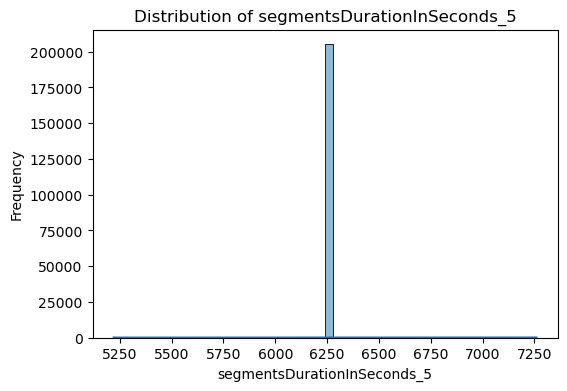

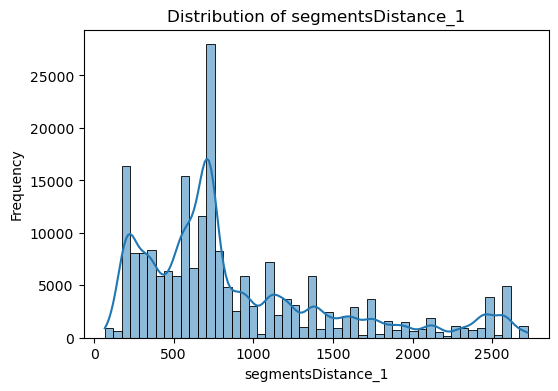

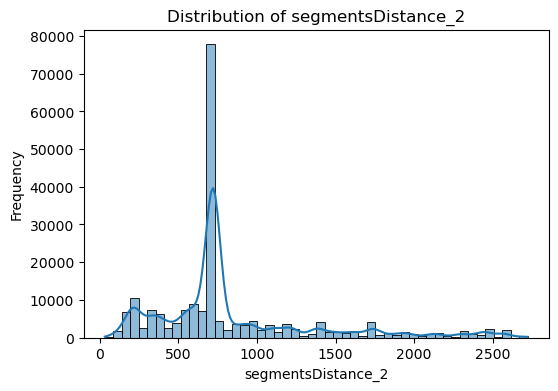

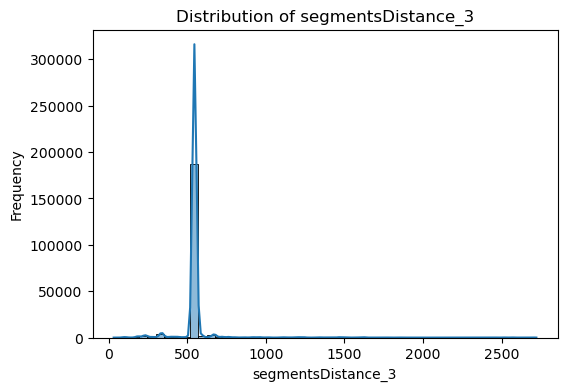

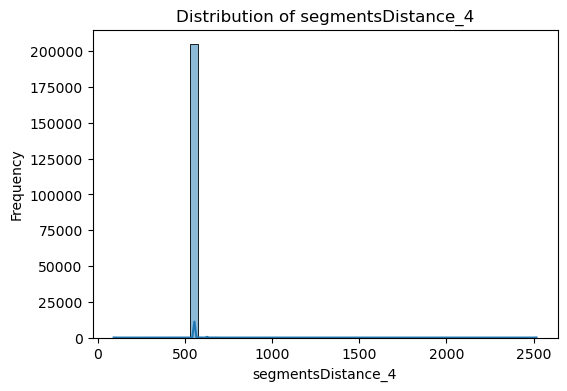

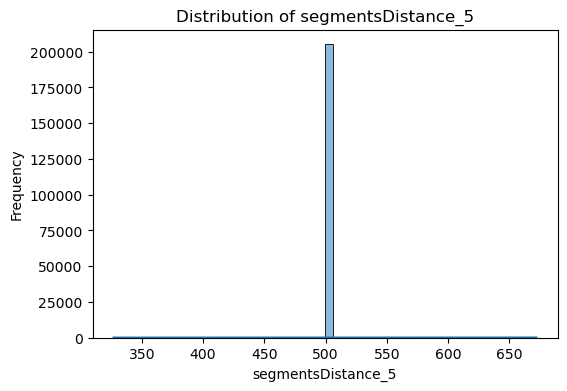

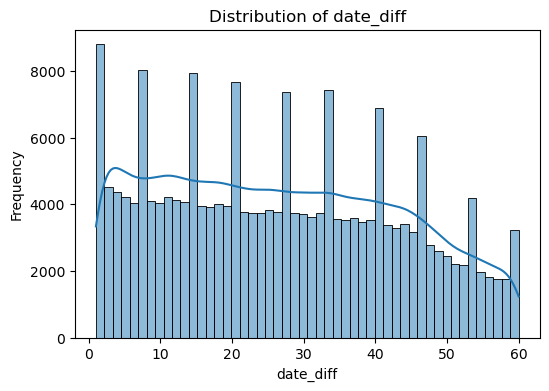

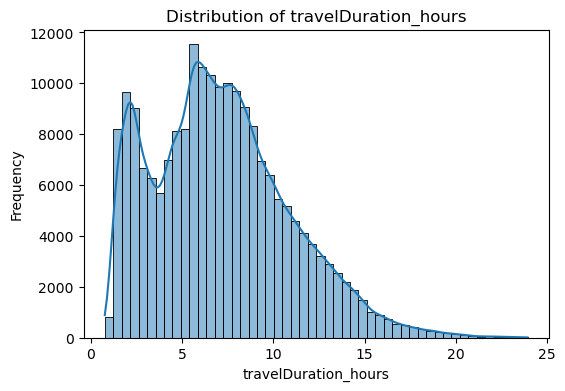

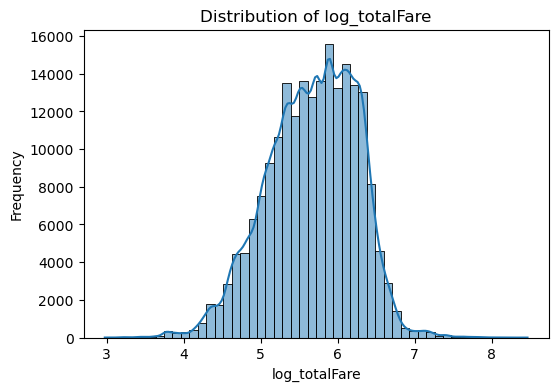

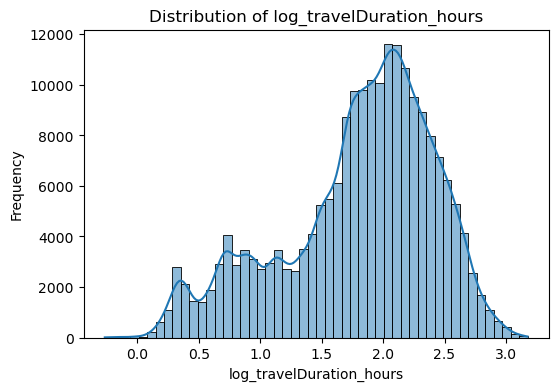

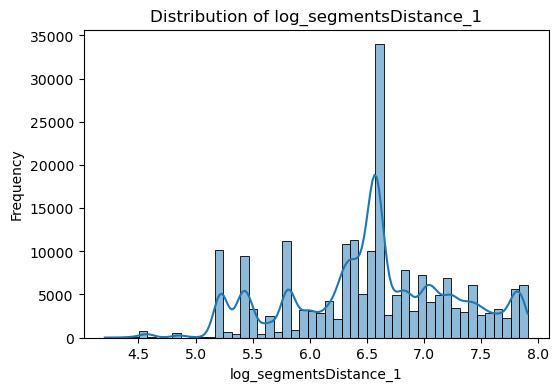

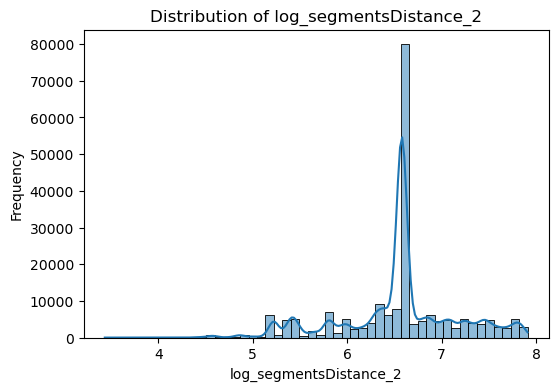

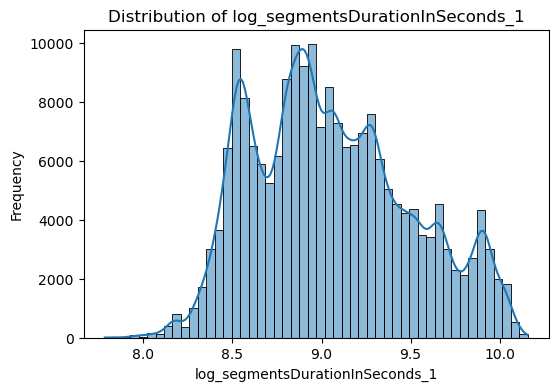

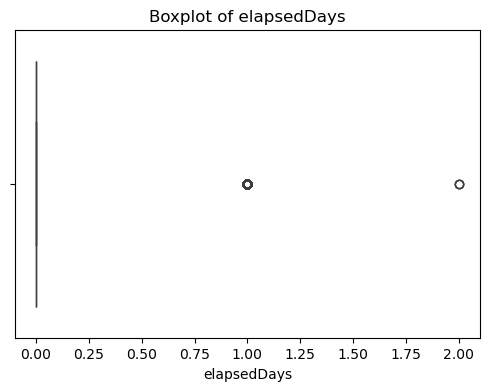

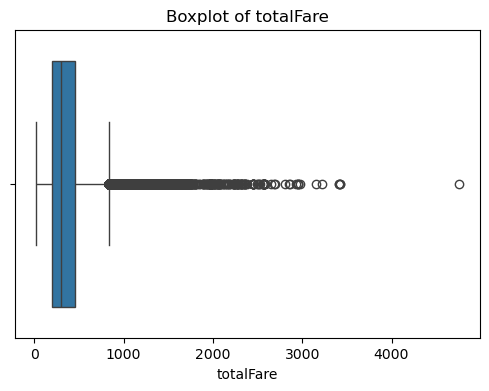

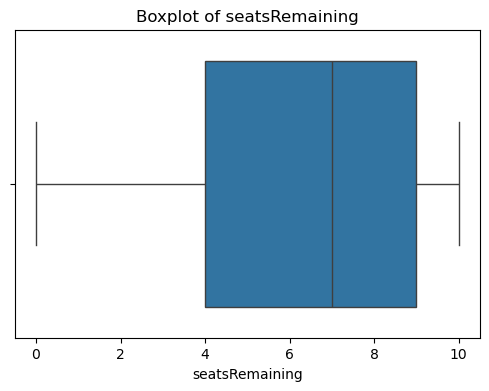

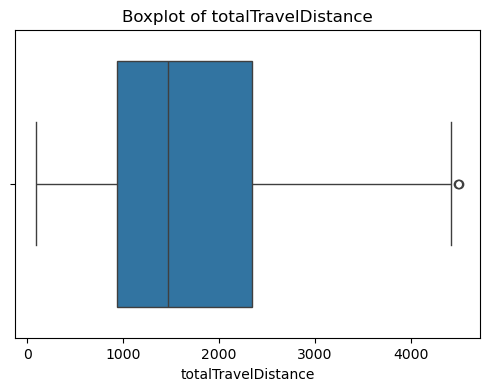

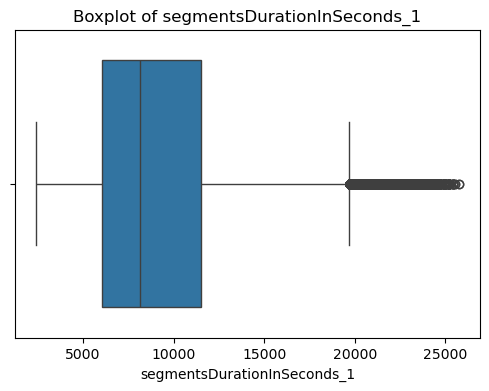

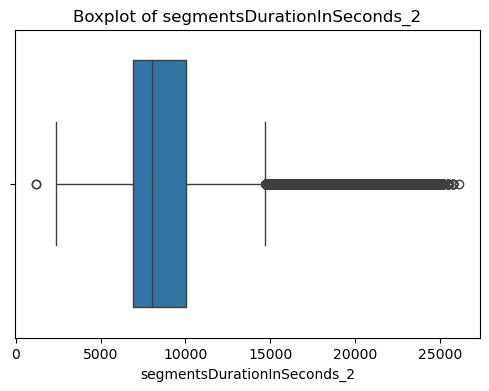

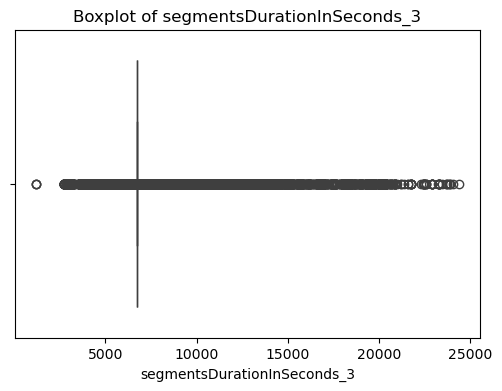

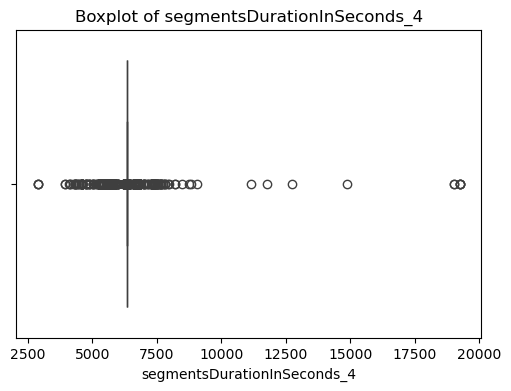

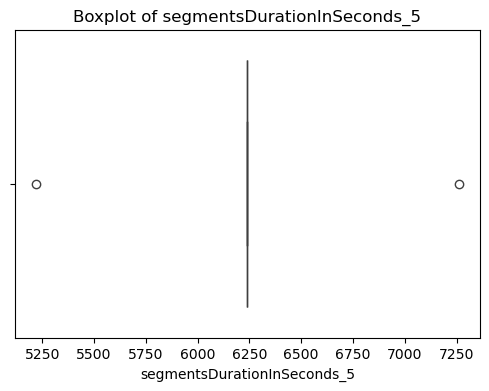

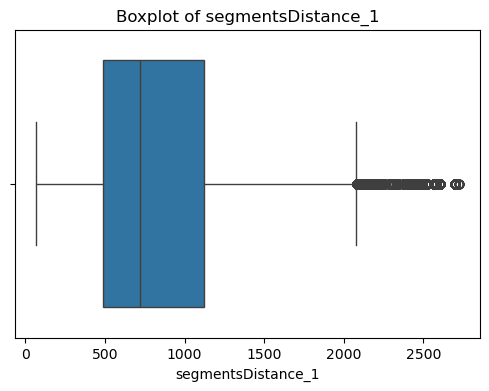

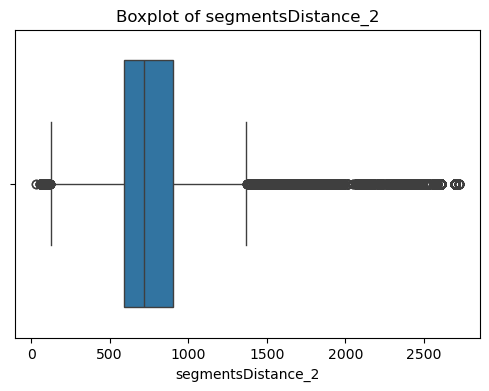

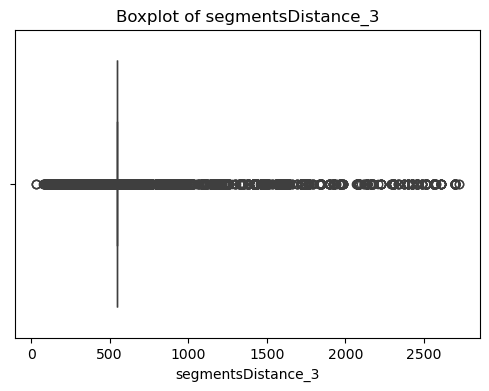

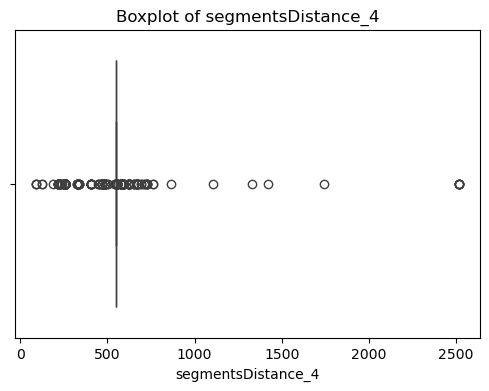

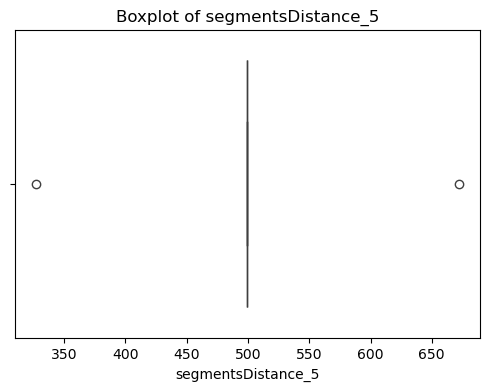

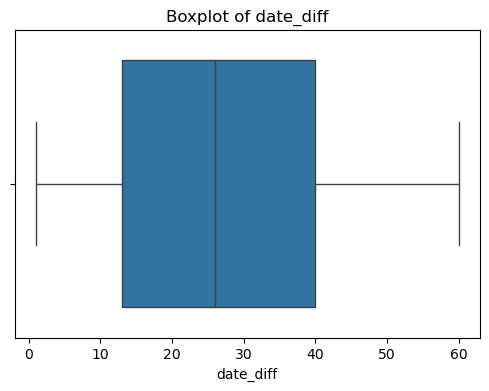

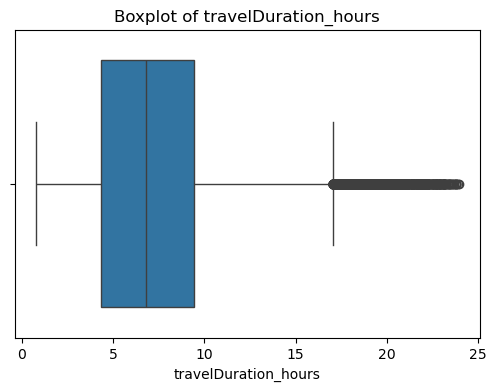

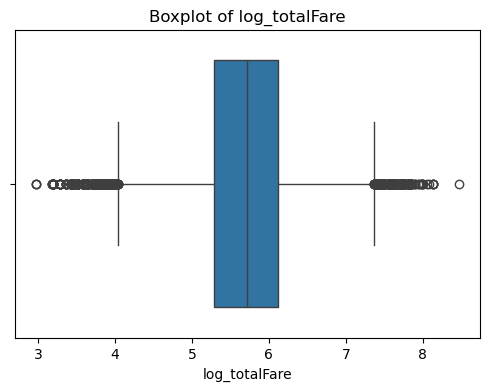

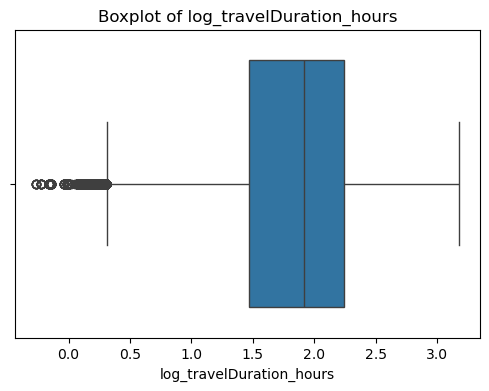

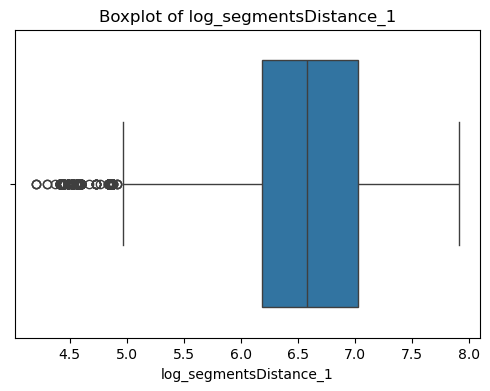

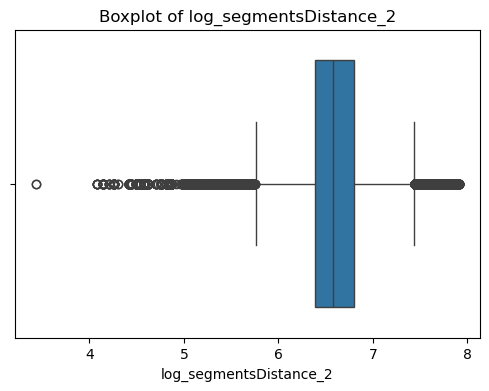

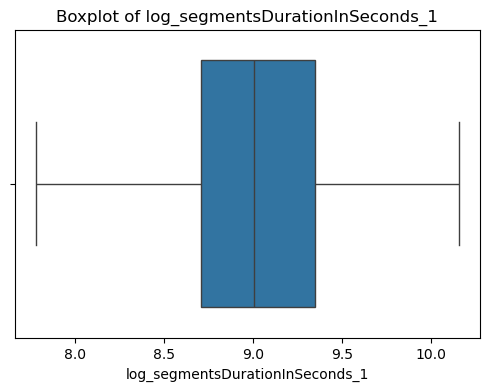

In [70]:
# -------- Handling Outliers ----------

# For integers 

num_col = data.select_dtypes(['int64', 'float64', 'Int64']).columns.tolist()

# Plot histograms for all numerical columns
for col in num_col:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], bins=50, kde=True)  # histogram + density
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Optional: Boxplots to see outliers clearly
for col in num_col:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [72]:
# for categorical variables
threshold = 0.10  
n_rows = len(data)

for col in cat_cols:
    freq = data[col].value_counts() / n_rows
    rare_categories = freq[freq < threshold]
    
    if len(rare_categories) > 0:
        print(f"{col}: {list(rare_categories.index)}")


startingAirport: ['LAX', 'LGA', 'BOS', 'DFW', 'SFO', 'ORD', 'CLT', 'ATL', 'MIA', 'PHL', 'DEN', 'DTW', 'JFK', 'EWR', 'OAK', 'IAD']
destinationAirport: ['LAX', 'LGA', 'DFW', 'BOS', 'ORD', 'SFO', 'CLT', 'ATL', 'MIA', 'PHL', 'DEN', 'DTW', 'JFK', 'EWR', 'OAK', 'IAD']
segmentsArrivalAirportCode_1: ['ORD', 'ATL', 'CLT', 'BOS', 'JFK', 'DFW', 'LAX', 'EWR', 'LGA', 'DEN', 'IAD', 'DTW', 'IAH', 'SEA', 'DCA', 'MIA', 'SLC', 'SFO', 'LAS', 'MCO', 'MSP', 'PHX', 'PHL', 'FLL', 'AUS', 'RDU', 'BNA', 'PDX', 'PIT', 'CLE', 'BWI', 'TPA', 'MYR', 'RIC', 'ONT', 'ORF', 'STL', 'CHS', 'JAX', 'ROC', 'MSY', 'CMH', 'SYR', 'BTV', 'OAK', 'PWM', 'MEM', 'MCI', 'SAV', 'CVG', 'SAN', 'IND', 'DAL', 'GSO', 'BOI', 'SAT', 'ABQ', 'CHO', 'DUJ', 'GEG', 'SNA', 'BHM', 'UIN', 'RSW', 'ROA', 'SLK', 'BZN', 'TTN', 'LNS', 'MSS', 'LIT', 'BUF', 'LEX', 'HSV', 'TUL', 'TUS', 'SHV', 'CEZ', 'OKC', 'XNA', 'PBI', 'GSP', 'SDF', 'ELP', 'SBA', 'TEX', 'SMF', 'MDT', 'AVL', 'HPN', 'TYS', 'BDL', 'DAY', 'PNS', 'ACK', 'CVN', 'MGW', 'BJC', 'MFR', 'PVD', 'CHA',